#Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

!java -version
!sudo update-alternatives --config java
!java -version/

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

#importing libraries for spark mllib 
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

openjdk version "11.0.5" 2019-10-15
OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04)
OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
Unrecognized option: -version/
Error: Could not create the Java Virtual Machine.
Error: A fatal exception has occurred. Program will

In [3]:
import pandas as pd
from datetime import datetime
from pyspark.sql.types import *

!pip install git+https://github.com/coreylynch/pyFM
import numpy as np
import pandas as pd
from datetime import datetime
import json
from tqdm import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
import itertools
import scipy as sp
from sklearn.feature_extraction import DictVectorizer
from pyfm import pylibfm
from sklearn.preprocessing import normalize
from scipy import sparse

from numpy.linalg import norm
from sklearn.pipeline import FeatureUnion
#from transformers import *
from scipy.sparse import coo_matrix
#import simplejson as json
from datetime import datetime
#from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder

  Cloning https://github.com/coreylynch/pyFM to /tmp/pip-req-build-7c5vpglc
  Running command git clone -q https://github.com/coreylynch/pyFM /tmp/pip-req-build-7c5vpglc
  Created wheel for pyfm: filename=pyfm-0.0.0-cp36-cp36m-linux_x86_64.whl size=220633 sha256=178710951a08656f3b0f9b11dfd55a3c85b4b41f9aa2437263f6ce314341749e
  Stored in directory: /tmp/pip-ephem-wheel-cache-05b87coi/wheels/3b/d9/ef/1b148c527d39344632833679e79b3db1798a40b0f64f917b13
Successfully built pyfm


In [0]:
import matplotlib.pyplot as plt

#Loading Datasets

In [0]:
#Importing Review Data
line_count = len(open("/content/drive/My Drive/yelp_dataset/review.json").readlines())
user_ids, business_ids, stars, dates = [], [], [], []
with open("/content/drive/My Drive/yelp_dataset/review.json") as f:
  for line in tqdm(f, total=line_count):
       blob = json.loads(line)
       user_ids += [blob["user_id"]]
       business_ids += [blob["business_id"]]
       stars += [blob["stars"]]
       dates += [blob["date"]]
ratings = pd.DataFrame(
   {"user_id": user_ids, "business_id": business_ids, "rating": stars, "date": dates}
)
user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()


#Importing Business data
line_count = len(open("/content/drive/My Drive/yelp_dataset/business.json").readlines())
business_ids, names, addresses, cities, states, postal_codes, latitudes, longitudes, stars, review_counts, is_open, attributes, categories, hours = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
with open("/content/drive/My Drive/yelp_dataset/business.json") as f:
  for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        names += [blob["name"]]
        addresses += [blob["address"]]
        cities += [blob["city"]]
        states += [blob["state"]]
        postal_codes += [blob["postal_code"]]
        latitudes += [blob["latitude"]]
        longitudes += [blob["longitude"]]
        stars += [blob["stars"]]
        review_counts += [blob["review_count"]]
        is_open += [blob["is_open"]]
        attributes += [blob["attributes"]]
        categories += [blob["categories"]]
        hours += [blob["hours"]]
businesses = pd.DataFrame(
    {"business_id": business_ids, "name": names, "address": addresses, "city": cities, "state": states, "postal_code": postal_codes, "latitude": latitudes, "longitude": longitudes, "rating": stars, "review_count": review_counts, "is_open": is_open, "attributes": attributes, "categories": categories, "hours": hours}
)

#Imporing User data

line_count = len(open("/content/drive/My Drive/yelp_dataset/user.json").readlines())
user_id, review_cnt, yelping_since, useful, funny, cool, fans, avg_user_rating, yrs_elite, \
compliment_hot, compliment_more, compliment_profile, compliment_cute, compliment_list, \
compliment_note, compliment_plain, compliment_cool, \
compliment_funny, compliment_writer, compliment_photos = [], [], [], [],[], [], [], [], [],[], [], [], [], [],[], [], [], [], [],[] 

with open("/content/drive/My Drive/yelp_dataset/user.json") as f:
  for line in tqdm(f, total=line_count):
       blob = json.loads(line)
       user_id += [blob["user_id"]]
       review_cnt += [blob["review_count"]]
       yelping_since += [blob["yelping_since"]]
       useful += [blob["useful"]]
       funny += [blob["funny"]]
       cool += [blob["cool"]]
       fans += [blob["fans"]]
       avg_user_rating += [blob["average_stars"]]
       yrs_elite += [blob["elite"]]
       compliment_hot += [blob['compliment_hot']]
       compliment_more += [blob['compliment_more']]
       compliment_profile += [blob['compliment_profile']]
       compliment_cute += [blob['compliment_cute']]
       compliment_list += [blob['compliment_list']]
       compliment_note += [blob['compliment_note']]
       compliment_plain += [blob['compliment_plain']]
       compliment_funny += [blob['compliment_funny']]
       compliment_writer += [blob['compliment_writer']]
       compliment_photos += [blob['compliment_photos']]
user = pd.DataFrame(
   {"user_id": user_id, "review_cnt": review_cnt, "yelping_since": yelping_since, "useful": useful,"funny": funny,
    "cool": cool, "fans": fans, "avg_user_rating": avg_user_rating, "yrs_elite": yrs_elite, "compliment_hot": compliment_hot,
    "compliment_more": compliment_more, "compliment_profile": compliment_profile, "compliment_cute": compliment_cute,
   "compliment_list": compliment_list, "compliment_note": compliment_note, "compliment_plain": compliment_plain,
   "compliment_funny": compliment_funny, "compliment_writer": compliment_writer, "compliment_photos": compliment_photos}
)

100%|██████████| 1637138/1637138 [00:56<00:00, 29105.73it/s]


In [0]:
user['years_elite'] = user['yrs_elite'].str.split(',').apply(lambda x: np.where(x==[''],0,len(x)))

In [0]:
data = pd.merge(ratings, businesses, left_on='business_id', right_on='business_id', how='left')
data = pd.merge(data, user, left_on='user_id', right_on='user_id', how='left')

#Data Analysis

In [0]:
data['isActive'] = data.user_id.isin(active_users).astype(int)
data1 = data[data.loc[:,'isActive'] == 1]
data1 = data1.iloc[:,:36]
data1.shape

(4538272, 36)

In [0]:
categoryList = data1.categories.to_list()
newList = list()
categoryList
for cat in categoryList:
  if cat != None:
    temp = cat.split(',')
    for t in temp:
      t = t.strip()
      if t not in newList:
        newList.append(t)

In [0]:
print("Total number of unique categories in our data = " + str(len(newList)))

Total number of unique categories in our data = 1297


In [0]:
categoryDict = dict()
for cat in categoryList:
  categoryDict[cat] = 0

for index, row in data1.iterrows():
  cat = row['categories']
  for key, value in categoryDict.items():
    if key in cat:
      categoryDict[key] = categoryDict[key] + 1

In [0]:
mask_restaurants = data1['categories'].str.contains('Restaurants')
mask_food = data1['categories'].str.contains('Food')
restaurants_and_food = data1[mask_restaurants & mask_food]
restaurants_and_food_business_ids = restaurants_and_food.business_id.to_list()
data1['isRestaurant'] = data1.business_id.isin(restaurants_and_food_business_ids).astype(int)
data2 = data1[data1.loc[:,'isRestaurant'] == 1]
data2 = data2.iloc[:,:36]
data2.shape

(993406, 36)

In [0]:
active_restaurants_ids = restaurants_and_food.loc[restaurants_and_food['is_open'] == 1].business_id.tolist()
data2['isOpen'] = data2.business_id.isin(active_restaurants_ids).astype(int)
data2 = data2[data2.loc[:,'isOpen'] == 1]
data2 = data2.iloc[:,:36]
data2.shape

(852842, 36)

In [0]:
stateWise = data2.groupby('state').count()
#stateWise.head()
len(stateWise)

18

<BarContainer object of 18 artists>

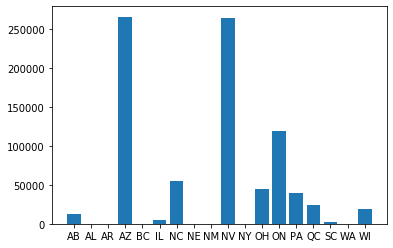

In [0]:
plt.bar(stateWise.index, stateWise['user_id'])

In [0]:
#Here we chose Nevada as the state to subset on, next lets check the number of ratings in the cities in Nevada
countryWise = data2.loc[data2['state'] == 'NV']
countryWise['city'] = countryWise['city']
countryWise = countryWise.groupby('city').count()

cities = countryWise.index.to_list()
cities = [c.lower() for c in cities]

countryWise['city'] = cities

countryWise.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,business_id,rating_x,date,name,address,state,postal_code,latitude,longitude,rating_y,review_count,is_open,attributes,categories,hours,review_cnt,yelping_since,useful,funny,cool,fans,avg_user_rating,yrs_elite,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_funny,compliment_writer,compliment_photos,years_elite,city
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Blue Diamond,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,blue diamond
Boulder City,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1562,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,1624,boulder city
Clark,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,clark
Enterprise,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,enterprise
Henderson,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27030,27059,26339,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,27059,henderson


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

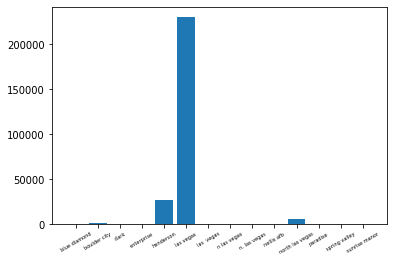

In [0]:
plt.bar(countryWise['city'], countryWise['user_id'])
plt.xticks(fontsize=5, rotation=30)

In [0]:
userList = data2.user_id.to_list()
uniqueList = set(userList)
len(uniqueList)

219835

In [0]:
userRating = dict()
userRating['less than 5'] = 0
userRating['5-10'] = 0
userRating['10-15'] = 0
userRating['15-20'] = 0
userRating['greater than 20'] = 0

for index, row in userRatingCount.iterrows():
  if row['business_id'] < 5:
    userRating['less than 5'] = userRating['less than 5'] + 1
  elif row['business_id'] < 10:
    userRating['5-10'] = userRating['5-10'] + 1
  elif row['business_id'] < 15:
    userRating['10-15'] = userRating['10-15'] + 1
  elif row['business_id'] < 20:
    userRating['15-20'] = userRating['15-20'] + 1
  else:
    userRating['greater than 20'] = userRating['greater than 20'] + 1
userRating

{'10-15': 7215,
 '15-20': 3118,
 '5-10': 28678,
 'greater than 20': 5200,
 'less than 5': 175624}

<BarContainer object of 5 artists>

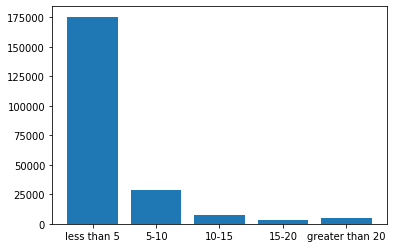

In [0]:
x = list()
y = list()
for key, value in userRating.items():
  x.append(key)
  y.append(value)
plt.bar(x, y)

#Baseline for Subset 1

In [0]:
path = "/content/drive/My Drive/yelp_dataset/Copy of data1.csv"
data2 = pd.read_csv(path)

In [46]:
#here we take only the users that have rated more than 5 movies 
user_counts_2 = data2["user_id"].value_counts()
active_users_2 = user_counts_2.loc[user_counts_2 >= 5].index.tolist()

data2['isActive'] = data2.user_id.isin(active_users_2).astype(int)
data3 = data2[data2.loc[:,'isActive'] == 1]
data3 = data3.iloc[:,:36]
data3.shape

(508029, 36)

In [47]:
userList_1 = data3.user_id.to_list()
uniqueList_1 = set(userList_1)
len(uniqueList_1)

44211

In [48]:
labels, uniques = pd.factorize(data3['user_id'])
data3 = data3.assign(user_id_encoded = labels)
cols = data3.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data3[cols]

labels, uniques = pd.factorize(data3['business_id'])
data3 = data3.assign(business_id_encoded = labels)
cols = data3.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data3[cols]
data3.head()

,business_id_encoded,user_id_encoded,Unnamed: 0,user_id,business_id,rating_x,date,name,address,city,state,postal_code,latitude,longitude,rating_y,review_count,is_open,attributes,categories,hours,review_cnt,yelping_since,useful,funny,cool,fans,avg_user_rating,yrs_elite,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_funny,compliment_writer,compliment_photos
0,0,0,6,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,2016-05-07 01:21:02,Tracy Dessert,"3235 Highway 7 E, Unit 29",Markham,ON,L3R 3P9,43.848936,-79.347801,3.5,122,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food, Chinese, Restaurants, Desserts","{'Monday': '14:0-0:0', 'Tuesday': '14:0-0:0', ...",600,2015-06-18 22:57:20,4346,2302,4067,83,3.75,"2015,2016,2017,2018",151,33,25,5,5,122,262,280,79,67
3,1,1,28,q3GeSW9dWN9r_ocqFkhrvg,9nTF596jDvBBia2EXXiOOg,1.0,2014-04-19 15:03:17,I Tea Cafe,709 Bellefonte St,Pittsburgh,PA,15232,40.452180,-79.934234,3.0,80,1,"{'BikeParking': 'True', 'HasTV': 'True', 'Busi...","Bubble Tea, Juice Bars & Smoothies, Taiwanese,...","{'Tuesday': '11:30-21:30', 'Wednesday': '11:30...",7,2011-02-14 05:21:23,7,0,1,0,3.43,NaN,0,0,0,0,0,0,0,0,0,0
6,2,2,79,1BcNXW9_Y16TIofPVpFqIA,vhIJ91MDgUuk4Cr9Kpj1Nw,1.0,2015-07-16 05:40:33,Jimmy John's,680 S Mill Ave,Tempe,AZ,85281,33.423975,-111.940351,3.0,130,1,"{'RestaurantsDelivery': 'True', 'OutdoorSeatin...","Food, Fast Food, Food Delivery Services, Sandw...","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",142,2009-09-24 19:12:47,283,76,104,17,3.30,NaN,0,0,0,0,0,3,4,3,10,0
9,3,3,109,lb0QUR5bc4O-Am4hNq9ZGg,r5PLDU-4mSbde5XekTXSCA,4.0,2013-01-27 17:54:54,Defalco's Italian Grocery,"2334 N Scottsdale Rd, Ste A133",Scottsdale,AZ,85257,33.474059,-111.927144,4.5,1272,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Sandwiches, Delis, Grocery, Food, Italian, Res...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",188,2011-03-15 23:15:17,358,160,173,19,3.93,"2013,2014,2015",13,1,2,1,0,7,10,20,13,0
11,4,4,126,x37OyP--VEFE5p-xreplYA,tjAeaGdxf7I4xN9M7wGJNQ,5.0,2014-07-13 14:32:56,Pure Pizza,224 E 7th St,Charlotte,NC,28202,35.227582,-80.837912,4.0,259,1,"{'Caters': 'True', 'RestaurantsDelivery': 'Fal...","Vegetarian, Gluten-Free, Food, Restaurants, Pi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ...",326,2013-01-21 16:06:42,548,142,240,32,3.64,"2013,2014,2015,2016,2017,2018",23,7,2,1,0,9,33,28,40,28


In [0]:
df_3 = data3.drop(data3.columns[7:38], axis=1)

In [61]:
df_3 = df_3.drop(columns = ['Unnamed: 0'])
df_3.head(1)

,business_id_encoded,user_id_encoded,user_id,business_id,rating_x,date
0,0,0,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,2016-05-07 01:21:02


In [0]:
df_3['review_rating'] = df_3.index
test_df_2 = df_3.sort_values(['user_id', 'date'], ascending=[True, False])
test_df_2 = test_df_2.groupby('user_id').first().reset_index()

train_df_2 = df_3[~df_3['review_rating'].isin(test_df_2['review_rating'])]

In [68]:
#baseline model using surprise BaseLine
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

#training_new=training.toPandas()
#test_new=test.toPandas()

print('Using SGD')
bsl_options = {'method': 'sgd',
               'learning_rate': .000005,
               }
algo = BaselineOnly(bsl_options=bsl_options)
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(train_df_2[['user_id', 'business_id', 'rating_x']], reader)
data_test = Dataset.load_from_df(test_df_2[['user_id', 'business_id', 'rating_x']], reader)

trainset = data_train.build_full_trainset()
algo.fit(trainset)

trainset, testset = train_test_split(data_test, test_size=1.0)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

Using SGD
Estimating biases using sgd...
RMSE: 1.3522
MAE:  1.1219


1.1218843285869382

#Baseline for Subset 2

In [0]:
city_name = "Las Vegas"
path = "/content/drive/My Drive/yelp_dataset/"
header = ['user_id', 'business_id', 'rating', 'date']
data3 = pd.read_csv(path + city_name + '_reviews_ratings_only.txt', sep='\t', names = header)

In [0]:
labels, uniques = pd.factorize(data3['user_id'])
data3 = data3.assign(user_id_encoded = labels)
cols = data3.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data3[cols]

labels, uniques = pd.factorize(data3['business_id'])
data3 = data3.assign(business_id_encoded = labels)
cols = data3.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data3[cols]
data3.head()

,business_id_encoded,user_id_encoded,user_id,business_id,rating,date
0,0,0,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,2012-02-29 21:52:43
1,1,1,FIk4lQQu1eTe2EpzQ4xhBA,8mIrX_LrOnAqWsB5JrOojQ,4.0,2011-11-30 02:11:15
2,2,2,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,2016-01-17 05:26:22
3,3,3,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,2014-12-17 19:04:33
4,4,4,fxrQSMhHlBv6eJVRdchG9Q,IMLrj2klosTFvPRLv56cng,4.0,2014-10-11 03:50:27


In [0]:
data3['review_rating'] = data3.index
test_df = data3.sort_values(['user_id', 'date'], ascending=[True, False])
test_df = test_df.groupby('user_id').first().reset_index()

train_df = data3[~data3['review_rating'].isin(test_df['review_rating'])]

In [0]:
training = spark.createDataFrame(train_df)
test = spark.createDataFrame(test_df)

In [0]:
test.count()

8635

In [0]:
#Testing it on the test data
start = datetime.now()
print("Start Time =", start)
als = ALS(maxIter=10, regParam=0.05, 
          userCol="user_id_encoded", itemCol="business_id_encoded", ratingCol="rating",
          coldStartStrategy="drop",
          implicitPrefs=False, rank=10)
model = als.fit(training)
end = datetime.now()
print("End Time =", end)
time_1 = (end - start).total_seconds()
print(time_1)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")

rmse = evaluator.evaluate(predictions)
rmse_1 = rmse
print("Root-mean-square error = " + str(rmse))

#calculating r2 as the secondary metric
evaluator = RegressionEvaluator(metricName="r2", labelCol="rating",
                                predictionCol="prediction")

r2 = evaluator.evaluate(predictions)
r2_1 = r2
print("Root-squared error = " + str(r2))

Start Time = 2019-12-18 21:24:41.903037
End Time = 2019-12-18 21:25:01.821973
19.918936
Root-mean-square error = 1.440539984614435
Root-squared error = -0.08697276061763382


In [0]:
train_df.head()

,business_id_encoded,user_id_encoded,user_id,business_id,rating,date,review_rating
0,0,0,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,2012-02-29 21:52:43,0
1,1,1,FIk4lQQu1eTe2EpzQ4xhBA,8mIrX_LrOnAqWsB5JrOojQ,4.0,2011-11-30 02:11:15,1
2,2,2,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,2016-01-17 05:26:22,2
3,3,3,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,2014-12-17 19:04:33,3
4,4,4,fxrQSMhHlBv6eJVRdchG9Q,IMLrj2klosTFvPRLv56cng,4.0,2014-10-11 03:50:27,4


In [0]:
#baseline model using surprise BaseLine
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

#training_new=training.toPandas()
#test_new=test.toPandas()

print('Using SGD')
bsl_options = {'method': 'sgd',
               'learning_rate': .000005,
               }
algo = BaselineOnly(bsl_options=bsl_options)
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(train_df[['user_id', 'business_id', 'rating']], reader)
data_test = Dataset.load_from_df(test_df[['user_id', 'business_id', 'rating']], reader)

trainset = data_train.build_full_trainset()
algo.fit(trainset)

trainset, testset = train_test_split(data_test, test_size=1.0)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

Using SGD
Estimating biases using sgd...
RMSE: 1.3826
MAE:  1.1631


1.1631404178113098

In [0]:
predictionsDf = predictions.toPandas()

In [0]:
predictionsDf.head()

,user_id,business_id_encoded,user_id_encoded,business_id,rating,date,review_rating,prediction
0,HfaT1zkgTnBEnqcrMZ4hrQ,148,5470,TTDMJetAQKfxVzKZy4Z_2Q,3.0,2016-07-08 01:29:55,18684,1.245465
1,dfQ1NTHZy0KZhOfeFK_nng,1088,1402,YIYE7Zk61McLaekLFluzTg,4.0,2017-01-29 17:23:09,51454,4.609038
2,NVvm8H9U_nzXkjrhPXkg5w,1238,8100,ItqPtxnayraXSlBS0EMOgg,3.0,2018-09-02 01:53:14,90600,4.954135
3,mTZIZkzVGBBQVSub9nlLwQ,1238,657,ItqPtxnayraXSlBS0EMOgg,5.0,2018-05-26 19:40:06,76459,3.425271
4,R0riGDpjLwqqD796_TbXkg,1238,6074,ItqPtxnayraXSlBS0EMOgg,5.0,2018-11-13 01:32:06,86438,4.149514


In [0]:
totalSparkDf = spark.createDataFrame(data3)

In [0]:
predictionsTotal = model.transform(totalSparkDf)

In [0]:
predictionsTotal.count()

456261

In [0]:
len(data3)

456288

In [0]:
predictionsTotalDf = predictionsTotal.toPandas()

In [0]:
predictionsTotalDf.head()

,business_id_encoded,user_id_encoded,user_id,business_id,rating,date,review_rating,prediction
0,148,5578,kDGhswMrYIOaFJAViW_nCA,TTDMJetAQKfxVzKZy4Z_2Q,3.0,2011-09-04 01:57:27,19602,2.397272
1,148,133,wXZS42D0L8hoCiSh2Krc_A,TTDMJetAQKfxVzKZy4Z_2Q,4.0,2018-09-20 00:00:29,22336,2.696219
2,148,2797,0JzIDpRUdnc_qgo5MEy5rA,TTDMJetAQKfxVzKZy4Z_2Q,1.0,2013-02-27 02:31:39,12413,2.020710
3,148,6639,5RLxzxLIY3ZXUUksr_dtXA,TTDMJetAQKfxVzKZy4Z_2Q,4.0,2012-01-18 22:08:57,25132,3.404771
4,148,784,j6Bdnlcu3mwrDmDIOPXbSg,TTDMJetAQKfxVzKZy4Z_2Q,2.0,2013-08-25 15:58:44,22019,2.238167


In [0]:
predictionsTotalDf = predictionsTotalDf.drop(columns = ['business_id_encoded', 'user_id_encoded', 'review_rating'])
predictionsTotalDf.head()

,user_id,business_id,rating,date,prediction
0,kDGhswMrYIOaFJAViW_nCA,TTDMJetAQKfxVzKZy4Z_2Q,3.0,2011-09-04 01:57:27,2.397272
1,wXZS42D0L8hoCiSh2Krc_A,TTDMJetAQKfxVzKZy4Z_2Q,4.0,2018-09-20 00:00:29,2.696219
2,0JzIDpRUdnc_qgo5MEy5rA,TTDMJetAQKfxVzKZy4Z_2Q,1.0,2013-02-27 02:31:39,2.020710
3,5RLxzxLIY3ZXUUksr_dtXA,TTDMJetAQKfxVzKZy4Z_2Q,4.0,2012-01-18 22:08:57,3.404771
4,j6Bdnlcu3mwrDmDIOPXbSg,TTDMJetAQKfxVzKZy4Z_2Q,2.0,2013-08-25 15:58:44,2.238167


In [0]:
predictionsTotalDf.to_csv('/content/drive/My Drive/' + 'ALSPredictions1.csv')


In [0]:
predictionsTotalDf.shape

(456261, 4)

In [0]:
data3.head()

,business_id_encoded,user_id_encoded,user_id,business_id,rating,date,review_rating
0,0,0,nMeCE5-xsdleyxYuNZ_7rA,oxwGyA17NL6c5t1Etg5WgQ,3.0,2012-02-29 21:52:43,0
1,1,1,FIk4lQQu1eTe2EpzQ4xhBA,8mIrX_LrOnAqWsB5JrOojQ,4.0,2011-11-30 02:11:15,1
2,2,2,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,2016-01-17 05:26:22,2
3,3,3,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,2014-12-17 19:04:33,3
4,4,4,fxrQSMhHlBv6eJVRdchG9Q,IMLrj2klosTFvPRLv56cng,4.0,2014-10-11 03:50:27,4


#Baseline for Subset 3

In [0]:
#city_name = "Las Vegas"
path = "/content/drive/My Drive/train_set_ap_final.csv"
#header = ['user_id', 'business_id', 'rating']
train_df = pd.read_csv(path)

In [6]:
labels, uniques = pd.factorize(train_df['user_id'])
train_df = train_df.assign(user_id_encoded = labels)
cols = train_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
train_df = train_df[cols]

labels, uniques = pd.factorize(train_df['business_id'])
train_df = train_df.assign(business_id_encoded = labels)
cols = train_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
train_df = train_df[cols]
train_df.head()

,business_id_encoded,user_id_encoded,user_id,business_id,rating
0,0,0,---1lKK3aKOuomHnwAkAow,rq5dgoksPHkJwJNQKlGQ7w,5.0
1,1,0,---1lKK3aKOuomHnwAkAow,zEaGcSVPDQipnRdEZp-F6g,2.0
2,2,0,---1lKK3aKOuomHnwAkAow,Qy_tDaVTWlS14fEglzo1Tg,4.0
3,3,0,---1lKK3aKOuomHnwAkAow,YCEZLECK9IToE8Mysorbhw,5.0
4,4,0,---1lKK3aKOuomHnwAkAow,p5rpYtxS5xPQjt3MXYVEwA,5.0


In [0]:
#city_name = "Las Vegas"
path = "/content/drive/My Drive/test_set_ap_final.csv"
#header = ['user_id', 'business_id', 'rating']
test_df = pd.read_csv(path)

In [8]:
labels, uniques = pd.factorize(test_df['user_id'])
test_df = test_df.assign(user_id_encoded = labels)
cols = test_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_df = test_df[cols]

labels, uniques = pd.factorize(test_df['business_id'])
test_df = test_df.assign(business_id_encoded = labels)
cols = test_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_df = test_df[cols]
test_df.head()

,business_id_encoded,user_id_encoded,user_id,business_id,rating
0,0,0,---1lKK3aKOuomHnwAkAow,_sh6mIBWZis66mAjkjN8Qg,5.0
1,1,1,--RlSfc-QmcHFGHyX6aVjA,AtD6B83S4Mbmq0t7iDnUVA,5.0
2,2,2,-05XqtNjcBq19vh2CVJN8g,Tefx_N6A6nrsdj4jHHnbYg,5.0
3,3,3,-0HhZbPBlB1YZx3BhAfaEA,x8O-Mll5ksDpeIgtA0XY-w,3.0
4,4,4,-21ooEUDqBkCF0hr94Pvgg,4aCun88uZMOsAoymY5Li3w,4.0


In [0]:
training = spark.createDataFrame(train_df)
test = spark.createDataFrame(test_df)

In [10]:
test.count()

4363

In [27]:
#Testing it on the test data
start = datetime.now()
print("Start Time =", start)
als = ALS(maxIter=10, regParam=0.05, 
          userCol="user_id_encoded", itemCol="business_id_encoded", ratingCol="rating",
          coldStartStrategy="drop",
          implicitPrefs=False, rank=30)
model = als.fit(training)
end = datetime.now()
print("End Time =", end)
time_1 = (end - start).total_seconds()
print(time_1)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")

rmse = evaluator.evaluate(predictions)
rmse_1 = rmse
print("Root-mean-square error = " + str(rmse))

#calculating r2 as the secondary metric
evaluator = RegressionEvaluator(metricName="r2", labelCol="rating",
                                predictionCol="prediction")

r2 = evaluator.evaluate(predictions)
r2_1 = r2
print("Root-squared error = " + str(r2))

Start Time = 2019-12-19 17:30:48.009821
End Time = 2019-12-19 17:30:52.933379
4.923558
Root-mean-square error = 1.7748372706948814
Root-squared error = -0.6926637620733604


In [30]:
#baseline model using surprise BaseLine
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

#training_new=training.toPandas()
#test_new=test.toPandas()

print('Using SGD')
bsl_options = {'method': 'sgd',
               'learning_rate': .000005
               }
algo = BaselineOnly(bsl_options=bsl_options)
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(train_df[['user_id', 'business_id', 'rating']], reader)
data_test = Dataset.load_from_df(test_df[['user_id', 'business_id', 'rating']], reader)

trainset = data_train.build_full_trainset()
algo.fit(trainset)

trainset, testset = train_test_split(data_test, test_size=1.0)
predictions_3 = algo.test(testset)

accuracy.rmse(predictions_3)
accuracy.mae(predictions_3)

Using SGD
Estimating biases using sgd...
RMSE: 1.3635
MAE:  1.1448


1.1447658251366994

In [0]:
predictionsTotalDf3 = predictions.toPandas()

In [0]:
predictionsTotalDf3.to_csv('/content/drive/My Drive/' + 'ALSPredictions3.csv')